## Тема “Обучение с учителем”

### Задание 1
Импортируем библиотеки `pandas` и `numpy`.

In [1]:
import numpy as np
import pandas as pd

Загрузим "Boston House Prices dataset" из встроенных наборов данных библиотеки `sklearn`.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

Создадим датафреймы `X` и `y` из этих данных.

In [3]:
# посмотрим какие ключи в датасете `boston`
print(boston.keys())

# загрузим данные `boston.data` в переменную `data` и посмотрим ее размерность
data = boston['data']
print(data.shape)

# в датафрейме `X` будут храниться признаки
X = pd.DataFrame(data, columns=boston.feature_names)
X.head()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# мы видим, что в датасете нет пропущенных данных
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
# в датафрейме `у` будут храниться данные о цене на недвижимость
y = pd.DataFrame(boston.target, columns=['price'])

# мы видим, что в датасете `y` также нет пропущенных данных
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
price    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


Разобьем эти датафреймы на тренировочные (`X_train`, `y_train`) и тестовые (`X_test`, `y_test`) с помощью функции `train_test_split` так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент `random_state` зададим 42.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Создадим модель линейной регрессии под названием `lr` с помощью класса `LinearRegression` из модуля `sklearn.linear_model`.

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

Обучим модель на тренировочных данных (используя все признаки) и сделаем предсказание на тестовых.

Итак, чтобы обучить модель, мы используем метод `.fit`, в который передаём нашу тренировочную выборку:

In [8]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Теперь, когда модель обучена, мы можем получить предсказанные значения на объектах `X_test` с помощью метода `.predict`:

In [9]:
y_pred = lr.predict(X_test)
y_pred[:5]

array([[28.64896005],
       [36.49501384],
       [15.4111932 ],
       [25.40321303],
       [18.85527988]])

Создадим таблицу `DataFrame` чтобы сопоставить реальные значения с предсказанными. Поскольку массив `y_pred` является двумерным, переведём его в одномерный, используя метод `.flatten`.

In [10]:
check_test = pd.DataFrame({'y_test': y_test['price'],
                           'y_pred': y_pred.flatten()},
                          columns=['y_test', 'y_pred'])
check_test.head()

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280


Вычислим `R2` полученных предказаний с помощью `r2_score` из модуля `sklearn.metrics`.

In [11]:
from sklearn.metrics import r2_score

#чем ближе к 1 значение R2, тем более точное предсказание.
r2_score(y_test, y_pred)

0.711226005748496

### Задание 2
Создадим модель под названием `model` с помощью `RandomForestRegressor` из модуля `sklearn.ensemble`.
Сделайте агрумент `n_estimators` равным 1000, `max_depth` должен быть равен 12 и `random_state` сделайте равным 42.

In [12]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

Обучим модель на тренировочных данных аналогично тому, как мы обучали модель `LinearRegression`, но при этом в метод `fit` вместо датафрейма `y_train` поставим `y_train.values[:, 0]`, чтобы получить из датафрейма одномерный массив `Numpy`, так как для класса `RandomForestRegressor` в данном методе для аргумента `y` предпочтительно применение массивов вместо датафрейма.

In [13]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

Сделаем предсказание на тестовых данных и посчитаем `R2`. 
Мы можем получить предсказанные значения на объектах `X_test` с помощью метода `.predict`:

In [14]:
y_pred_RFR = model.predict(X_test)
y_pred_RFR[:5]

array([22.84613791, 31.15611352, 16.29722565, 23.82103598, 17.21214765])

Создадим таблицу `DataFrame` чтобы сопоставить реальные значения с предсказанными. Поскольку массив `y_pred_RFR` является двумерным, переведём его в одномерный, используя метод `.flatten` и сопоставим со значениями `y_pred`, полученными в предыдущем задании.

In [15]:
check_test_RFR = pd.DataFrame({'y_test': y_test['price'],
                           'y_pred_RFR': y_pred_RFR.flatten(),
                              'y_pred': y_pred.flatten()},
                          columns=['y_test', 'y_pred_RFR', 'y_pred'])
check_test_RFR.head()

,y_test,y_pred_RFR,y_pred
173,23.6,22.846138,28.648960
274,32.4,31.156114,36.495014
491,13.6,16.297226,15.411193
72,22.8,23.821036,25.403213
452,16.1,17.212148,18.855280


Вычислим `R2` полученных предказаний с помощью `r2_score` из модуля `sklearn.metrics`. Сравним с результатом из предыдущего задания.

In [16]:
#чем ближе значение R2 к 1 , тем более точное предсказание.
print('значение R2 с LR:', r2_score(y_test, y_pred)) # значение R2 с предыдущего задания, полученные с помощью LinearRegression 
print('значение R2 с RFR:', r2_score(y_test, y_pred_RFR)) # значение R2, полученные с помощью RandomForestRegressor

значение R2 с LR: 0.711226005748496
значение R2 с RFR: 0.8749965273218174


Значение `R2`, полученное вторым способом, с помощью `RandomForestRegressor` ближе к 1, чем `R2` - LinearRegression и значит, что модель, полученная в задании 2 работает лучше.

### * Задание 3
Вызовим документацию для класса `RandomForestRegressor` и найдем информацию об атрибуте `feature_importances_`.

In [17]:
?RandomForestRegressor

feature_importances_ : array of shape = [n_features]
The feature importances (the higher, the more important the feature).

С помощью этого атрибута найдем сумму всех показателей важности.

In [18]:
sum_feature_importances_=model.feature_importances_.sum()
print(sum_feature_importances_)

0.9999999999999999


Установим, какие два признака показывают наибольшую важность. Для этого визуализируем то, какой вклад вносит каждый из коэффициентов `feature_importances_`

In [19]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline

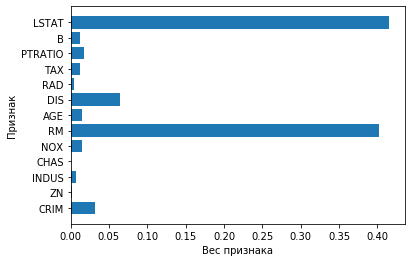

In [20]:
plt.barh(boston.feature_names, model.feature_importances_)

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [21]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Признаки:

- LSTAT    % lower status of the population
- RM       average number of rooms per dwelling

показывают наибольшую важность и составляют


In [22]:
feature_importances_boston = pd.Series(model.feature_importances_, boston.feature_names)
feature_importances_boston['RM'] + feature_importances_boston['LSTAT']

0.8183835131477253

### *Задание 4

В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке `Matplotlib`, это датасет `Credit Card Fraud Detection`. Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими. Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики `accuracy` не принесет пользы и не поможет выбрать лучшую модель. Мы будем вычислять `AUC`, то есть площадь под кривой `ROC`.

Импортируем из соответствующих модулей `RandomForestClassifier`, `GridSearchCV` и `train_test_split`.


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

Загрузим датасет `creditcard.csv` и создадим датафрейм `df`.

In [24]:
import pandas as pd
data=pd.read_csv('creditcard.csv')
df=data.copy()

С помощью метода `value_counts` с аргументом `normalize=True` убедимся в том, что выборка несбалансирована.
В нашем датасете мы определяем какие из транзакциции по кредитной карте являются мошенническими, целевыми значениями в нашем случае являются данные, определяемые по признаку `Class`.

In [25]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Как видно, значения с признаком `Class = 0` составляют более 99%.

Используя метод `info`, проверим, все ли столбцы содержат числовые данные и нет ли в них пропусков.


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Как видим, что все данные заполнены и они имеют числовой формат.

Применим следующую настройку, чтобы можно было просматривать все столбцы датафрейма: `pd.options.display.max_columns = 100`. 

In [27]:
pd.options.display.max_columns = 100

Просмотрим первые 10 строк датафрейма `df`.

In [28]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Создадим датафрейм `X` из датафрейма `df`, исключив столбец `Class`.

In [29]:
X = pd.DataFrame(df.drop('Class', axis=1))
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68


Создадим объект `Series` под названием `y` из столбца `Class`.

In [30]:
y=pd.Series(df['Class'])
y

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
284777    0
284778    0
284779    0
284780    0
284781    0
284782    0
284783    0
284784    0
284785    0
284786    0
284787    0
284788    0
284789    0
284790    0
284791    0
284792    0
284793    0
284794    0
284795    0
284796    0
284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

Разобьем `X` и `y` на тренировочный и тестовый наборы данных при помощи функции `train_test_split`, используя аргументы: `test_size=0.3`, `random_state=100`, `stratify=y`.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

Посмотрим информацию о форме `X_train`, `X_test`, `y_train`, `y_test`.

In [32]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(199364, 30) (85443, 30) (199364,) (85443,)


Рассмотрим несколько параметров модели `RandomForestClassifier`:

* `n_estimators` - число деревьев в ансамбле
* `max_features` - максимальное число признаков, которое может быть использовано при построении каждого дерева
* `max_depth` - максимальная глубина дерева

Для того, чтобы выбрать подходящий набор параметров, мы будем использовать `Grid search` или поиск по сетке. Этот метод используется для того, чтобы перебрать все возможные комбинации параметров и выбрать ту комбинацию, которая максимизирует выбранную нами метрику.

Для поиска по сетке параметров зададим следующие параметры:


In [33]:
parameters = {
    'n_estimators': [10, 15],
    'max_features': np.arange(3, 5),
    'max_depth': np.arange(4, 7),
}

Создадим модель `GridSearchCV` со следующими аргументами:

In [34]:
clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=100),
    param_grid=parameters,
    scoring='roc_auc',
    cv=3,
)

При оценке каждой построенной в процессе модели используется _кросс-валидация_. Это метод, при котором вся обучающая выборка разбивается на заданное число _фолдов_ (частей), и по очереди каждый из этих фолдов выкидывается из тренировочной выборки и используется для валидации. Другими словами, если `cv=3`, то мы строим 3 модели, для каждой из них выкидывая один из фолдов из обучающей выборки. Затем значения выбранной метрики усредняются на этих 3 моделях.

Обучим модель `clf` на тренировочном наборе данных (может занять несколько минут).


In [35]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={

Просмотрим параметры лучшей модели с помощью атрибута `best_params_`.

In [36]:
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

Полученная в результате модель аналогична такой модели:

In [37]:
clf = RandomForestClassifier(max_depth=6, max_features=3, n_estimators=15)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Предскажим вероятности классов с помощью полученнной модели `clf` и метода `predict_proba`.

In [38]:
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba[:10]

array([[9.99018690e-01, 9.81309742e-04],
       [9.99443276e-01, 5.56724396e-04],
       [9.99759960e-01, 2.40040337e-04],
       [9.99759960e-01, 2.40040337e-04],
       [9.99759960e-01, 2.40040337e-04],
       [9.99771199e-01, 2.28801138e-04],
       [9.99759960e-01, 2.40040337e-04],
       [9.99759960e-01, 2.40040337e-04],
       [9.99759960e-01, 2.40040337e-04],
       [9.99759960e-01, 2.40040337e-04]])

Из полученного результата (массив Numpy) выберем столбец с индексом 1 (вероятность класса 1) и запишим в массив `y_pred_proba`. Из модуля `sklearn.metrics` импортируем метрику `roc_auc_score`.

In [39]:
y_pred_proba = y_pred_proba[:, 1]
y_pred_proba

array([0.00098131, 0.00055672, 0.00024004, ..., 0.00024004, 0.00058032,
       0.07589682])

In [40]:
y_pred_proba[y_test == 0][:100]

array([0.00098131, 0.00055672, 0.00024004, 0.00024004, 0.00024004,
       0.0002288 , 0.00024004, 0.00024004, 0.00024004, 0.00024004,
       0.00024004, 0.00037224, 0.00024004, 0.00098786, 0.00024004,
       0.00051433, 0.00049108, 0.00024004, 0.00030944, 0.00027969,
       0.00024004, 0.00039372, 0.00037224, 0.00169003, 0.0002288 ,
       0.00024004, 0.00024004, 0.00024004, 0.00024004, 0.00024004,
       0.00024004, 0.00024004, 0.0005748 , 0.00024004, 0.00024004,
       0.00024004, 0.00024004, 0.00033444, 0.00024004, 0.00024004,
       0.00024004, 0.00024004, 0.00024004, 0.00024004, 0.00024004,
       0.00052697, 0.00024004, 0.00027969, 0.00024004, 0.00027969,
       0.00050309, 0.00099255, 0.00024004, 0.00024004, 0.00047648,
       0.00024004, 0.00030944, 0.0009529 , 0.00045143, 0.00047648,
       0.00096554, 0.00024004, 0.00100073, 0.00024004, 0.00024004,
       0.00024004, 0.00024004, 0.00024004, 0.00024004, 0.00305098,
       0.00024004, 0.00024004, 0.00024004, 0.00024004, 0.00024

In [41]:
from sklearn.metrics import roc_auc_score

Вычислим `AUC` на тестовых данных и сравним с результатом, полученным на тренировочных данных, используя в качестве аргументов массивы `y_test` и `y_pred_proba`.

In [42]:
roc_auc_score(y_test, y_pred_proba)

0.9484735013458854

In [43]:
y_pred_proba_train = clf.predict_proba(X_train)
y_pred_proba_train = y_pred_proba_train[:, 1]
roc_auc_score(y_train, y_pred_proba_train)

0.9726462427522768

Показатель `AUC` на тренировочных данных выше, чем на тестовых - это говорит о переобучении модели.

### *Дополнительные задания:
1) Загрузим датасет `Wine` из встроенных датасетов `sklearn.datasets` с помощью функции `load_wine` в переменную `data`.

In [44]:
from sklearn.datasets import load_wine
data = load_wine()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

2) Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрим тип данных этой структуры данных и создадим список `data_keys`, содержащий ее ключи.

In [45]:
print(type(data))
data_keys = data.keys()
data_keys

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

3) Просмотрим данные, описание и названия признаков в датасете. Описание выведем в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д

In [46]:
data['data']

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [47]:
print(data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [48]:
data['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

4) Сколько классов содержит целевая переменная датасета? Выведем названия классов.

In [49]:
data['target_names'] # целевая переменная содержит 3 класса

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

5) На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создадим датафрейм под названием `X`.

In [50]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


6) Выясним размер датафрейма `X` и установим, имеются ли в нем пропущенные значения.

In [51]:
print(X.shape)
X.info()

(178, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


Как видно, размер датафрейма `X` составляет `178 x 13` и пропущенные данные в нем отсутствуют.

7) Добавим в датафрейм поле с классами вин в виде чисел, имеющих тип данных `numpy.int64`. Название поля - `'target'`.

In [52]:
data['target'] = data['target'].astype('int64')
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [53]:
X['target'] = data['target']
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


8) Построим матрицу корреляций для всех полей `X`. Полученный датафрейм назовем `X_corr`.

In [54]:
X_corr = X.corr()
X_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


9) Создадим список `high_corr` из признаков, корреляция которых с полем `target` по абсолютному значению превышает 0.5 (причем, само поле `target` не должно входить в этот список).

In [55]:
high_corr = X_corr.loc[(X_corr['target'] > 0.5) & (X_corr['target'] != 1)]['target']
high_corr

alcalinity_of_ash    0.517859
Name: target, dtype: float64

10) Удалим из датафрейма `X` поле с целевой переменной.

In [56]:
X = pd.DataFrame(X.drop('target', axis=1))

In [57]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Для всех признаков, названия которых содержатся в списке `high_corr`, вычислим квадрат их значений и добавим в Датафрейм `X` соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака.

In [58]:
X['alcalinity_of_ash_2'] = X['alcalinity_of_ash'] * 2

Итоговый датафрейм содержит все поля, которые, были в нем изначально, а также поля с признаками из списка `high_corr`, возведенными в квадрат. Выведем описание полей датафрейма `X` с помощью метода `describe`.

In [59]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,38.989888
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,6.679128
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,21.200000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,34.400000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,39.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,43.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,60.000000
